<a href="https://colab.research.google.com/github/anecz17/WaterfowlProject171/blob/main/Copy_of_Preprocessing_%26_First_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing

In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data/IND')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1OjkxToBoT-cMDlQXaIoroA6AensM1CPn' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: 2019-11-14txt, id: 1NsQqjRtxFyCNLSKPdMVkLWQVnk6yGU4e
downloading to /root/data/IND/2019-11-14txt
title: 2019-11-13txt, id: 1XMt-81XpoG7d0jgnA1P8l7lB_d-vUDmT
downloading to /root/data/IND/2019-11-13txt
title: 2019-11-12txt, id: 1cutOO7vMDsMWltVaplfhi0WREFqWu2WC
downloading to /root/data/IND/2019-11-12txt
title: 2019-11-11txt, id: 1AYJTp0vt5cBEZfNaV3TbhH5ztmYsE_j0
downloading to /root/data/IND/2019-11-11txt
title: 2019-11-10txt, id: 1qWw32g6qAp0cED0VhzMBjINpGhpUt-Ek
downloading to /root/data/IND/2019-11-10txt
title: 2019-11-09txt, id: 1oy1dlreUfeRTvfpZPeyaV722Y6B-tumQ
downloading to /root/data/IND/2019-11-09txt
title: 2019-11-08txt, id: 1382sSx-F7F9PUOXmGUMptw_YSknG166Z
downloading to /root/data/IND/2019-11-08txt
title: 2019-11-07txt, id: 1h1i-KteHAr3iG3OfeqDHfuqgZJGTmNFq
downloading to /root/data/IND/2019-11-07txt
title: 2019-11-06txt, id: 1GRPk4WhC7VGsS5IFcquXz14BankHp2-q
downloading to /root/data/IND/2019-11-06txt
title: 2019-11-05txt, id: 1WNJdPQu4xQ8qTCffaLqy64fQ791UYPd7
down

In [ ]:
import csv
import pandas as pd
import numpy as np

PIXELS = 180

data = np.empty(shape=(14,PIXELS, PIXELS))
dates4data = []

#directory
directory = '/root/data/IND'
# iterate over files in
# that directory

i = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
      with open(f) as fileObject:
        #for i in range(PIXELS + 1):
          #line = next(fileObject)
        line = next(fileObject)
        #while line is not None:
        header = line
        for j in range(PIXELS):
          line = next(fileObject)
          values = np.empty(shape=PIXELS)
          values = np.fromstring(line, dtype=float, sep=',')
          data[i][j] = values
          dates4data.append(fileObject.name)
      i = i + 1

data

array([[[ -1.70833333,  10.60416667,   3.5625    , ...,   0.        ,
           0.        ,   0.        ],
        [ -2.45833333,   2.33333333,   1.47916667, ...,   0.        ,
           0.        ,   0.        ],
        [  2.20833333,   6.75      ,   6.10416667, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [ -5.875     ,   7.27083333,   6.25      , ...,   0.        ,
           0.        ,   0.        ],
        [ -5.45833333,   0.60416667,  10.29166667, ...,   0.        ,
           0.        ,   0.        ],
        [ -2.91666667,   3.79166667,   4.33333333, ...,   0.        ,
           0.        ,   0.        ]],

       [[ 12.89583333,  11.77083333,   5.52083333, ...,   0.        ,
           0.        ,   0.        ],
        [ 15.83333333,  10.27083333,   6.58333333, ...,   0.        ,
           0.        ,   0.        ],
        [ 24.33333333,  10.3125    ,  -3.25      , ...,   0.        ,
           0.        ,   0.        ],
        ...,


Importing classification:

In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1MJCQNYTOR-xPwgow9VYxlNEp0lUVYd0V' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: IND_allscreening.xlsx, id: 1VQRqNI1Qjeqb638gtiDtRvkLWn-OqhLw
downloading to /root/data/IND_allscreening.xlsx
title: ABR_allscreening.xlsx, id: 1fxhIn4E4zEzasir8TpC4TSqdN8Jkbe4U
downloading to /root/data/ABR_allscreening.xlsx
title: KDLH_allscreening.xlsx, id: 1YOqDsLDVG5c-18Ok526uuWLObx25ZYrc
downloading to /root/data/KDLH_allscreening.xlsx
title: KLVX_allscreening.xlsx, id: 1G0beWFoVntGiYWEDqYxcQ5IclM45qU7J
downloading to /root/data/KLVX_allscreening.xlsx


In [ ]:
# Iterate through allscreening folder

# import required module
import os
import pandas

#directory
directory = '/root/data'
# iterate over files in
# that directory

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        sheet = pandas.read_excel(f)
        print(sheet[{'DATE', 'STATUS'}])


ind_c = pandas.read_excel('/root/data/IND_allscreening.xlsx')

ind_c = ind_c[{'DATE', 'STATUS'}]

ind_c = ind_c.head(14)


contamination = {'NB' : 0, 'B' : 0, 'C' : 1}
ind_c = ind_c['STATUS'].map(contamination)

          DATE STATUS
0   2019-11-01      B
1   2019-11-02      C
2   2019-11-03      B
3   2019-11-04      C
4   2019-11-05      B
..         ...    ...
147 2020-03-27      C
148 2020-03-28      C
149 2020-03-29      B
150 2020-03-30      C
151 2020-03-31      C

[152 rows x 2 columns]
          DATE STATUS
0   2019-11-01      C
1   2019-11-02      C
2   2019-11-03      C
3   2019-11-04      C
4   2019-11-05      C
..         ...    ...
147 2020-03-27      C
148 2020-03-28      C
149 2020-03-29      C
150 2020-03-30      C
151 2020-03-31      C

[152 rows x 2 columns]
          DATE STATUS
0   2019-11-01      B
1   2019-11-02      C
2   2019-11-03     NB
3   2019-11-04      C
4   2019-11-05      B
..         ...    ...
147 2020-03-27      C
148 2020-03-28      C
149 2020-03-29      B
150 2020-03-30      C
151 2020-03-31      C

[152 rows x 2 columns]
          DATE STATUS
0   2019-10-01      C
1   2019-10-02      C
2   2019-10-03      C
3   2019-10-04      C
4   2019-10-05      C
..  

,DATE,STATUS
0,2019-11-01,B
1,2019-11-02,C
2,2019-11-03,NB
3,2019-11-04,C
4,2019-11-05,B
5,2019-11-06,C
6,2019-11-07,B
7,2019-11-08,NB
8,2019-11-09,NB
9,2019-11-10,C


#Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# importing data
X = data
y = ind_c['STATUS']
y = [ 1 if yh=='C' else 0 for yh in y ]
y = pd.DataFrame(y)

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

(11, 180, 180)

(11,)

In [ ]:
model = Sequential() # Initialising the ANN

# build your model and compile here:

# Using these two layers:
model.add(Dense(units = 32, activation = 'relu', input_dim = (X_train.shape[1])))
model.add(Dense(units = 16, activation = 'sigmoid'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# As you go above 10 epochs, the loss hovers around 0.643 until about epoch 70. At this point, it began decreasing again and was 0.61 at epoch 100. 
# It began reducing to 0.555 by epoch 150. At 500, it was still hovering 0.555.

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

model.fit(X_train.as(float), y_train, batch_size = 1, epochs = 50)

model1 = model

SyntaxError: ignored

In [ ]:
ynew = model3.predict(X_test)
ynew
yhat_test = [ 1 if y>=0.5 else 0 for y in ynew ]
yhat_test

print(classification_report(y_test, yhat_test, labels=np.unique(yhat_test)))

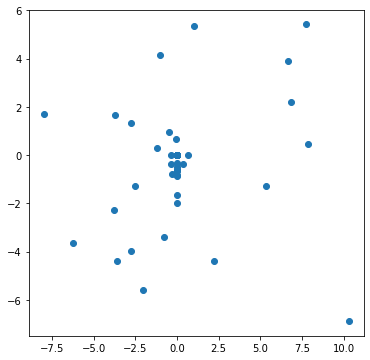

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(data[0][10], data[0][40])

# Credits

Importing data:
https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive